# Chap.15 教師なし学習2：クラスタリング

## 15.1 クラスタリングの概要

## 15.2 データの前処理

In [1]:
# 15-1 Wholesale.csvを読み込む
import pandas as pd

df = pd.read_csv('../support/datafiles/Wholesale.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
# 15-2 欠損値の確認
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [3]:
# 15-3 「Channel」「Region」を削除する
df = df.drop(['Channel', 'Region'], axis=1)

In [5]:
# 15-4 データを標準化する
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
sc_df = pd.DataFrame(sc_df, columns=df.columns)
sc_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## 15.3 クラスタリングの実行

In [7]:
# 15-5 モジュールのインポート
from sklearn.cluster import KMeans

In [8]:
# 15-6 モデルの作成
model = KMeans(n_clusters=3, random_state=0)

In [9]:
# 15-7 モデルに学習させる
model.fit(sc_df)

KMeans(n_clusters=3, random_state=0)

In [11]:
# 15-8 クラスタリングの結果を確認する
model.labels_

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2,

In [13]:
# 15-9 sc_dfにクラスタリングの結果を追加する
sc_df['cluster'] = model.labels_
print(sc_df.head())
print(sc_df.tail())

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   

   cluster  
0        2  
1        0  
2        0  
3        2  
4        2  
        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091   
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501   
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456   
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046   
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869   

     clu

## 15.4 結果の評価

In [14]:
# 15-10 groupby()メソッドでクラスタごとに集計する
sc_df.groupby('cluster').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,-0.507313,0.585563,0.809716,-0.324183,0.804182,0.083148
1,1.129319,3.805151,3.371239,1.573779,3.287741,2.198588
2,0.126563,-0.372418,-0.431222,0.043124,-0.425596,-0.126350


<AxesSubplot:xlabel='cluster'>

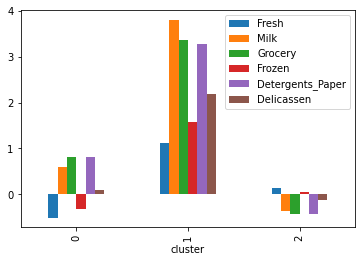

In [16]:
# 15-11 棒グラフで表示する
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind='bar')

In [18]:
# 15−12 クラスタ数を2~30でSSEを調べる
sse_list = []
for n in range(2, 31):
    model = KMeans(n_clusters=n, random_state=0)
    model.fit(sc_df)
    sse = model.inertia_
    sse_list.append(sse)

sse_list

[2043.7998084487572,
 1628.0214373385115,
 1324.145579493431,
 1066.5186766661338,
 923.6883688142489,
 833.8007189892958,
 750.0515288799979,
 669.7780011188455,
 619.9087831783496,
 573.2115000428759,
 531.0043836375461,
 504.8640528760742,
 481.42935645618627,
 445.672353607593,
 414.2430234107047,
 392.56279996963195,
 378.0524902274032,
 357.2243120820111,
 338.47368167180986,
 318.96015876817023,
 316.91244966047907,
 295.26984326838476,
 283.2102043727194,
 270.9592398675501,
 258.2591159268844,
 246.03351668333647,
 237.25299428030422,
 227.20770107034338,
 224.91060395203243]

<AxesSubplot:>

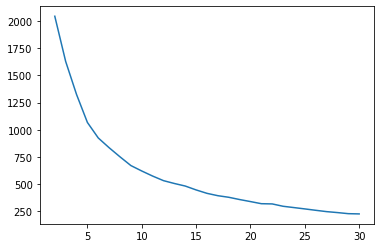

In [19]:
# 15-13 SSEの折れ線グラフを描画する
se = pd.Series(sse_list)
se.index = range(2, 31)
se.plot(kind='line')

<AxesSubplot:xlabel='cluster'>

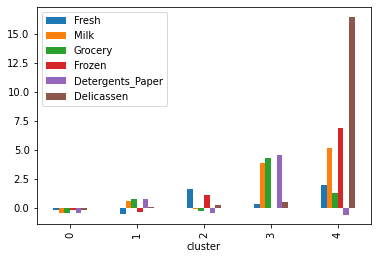

In [20]:
# 15-14 結果をCSVファイルに書き出す
model = KMeans(n_clusters=5, random_state=0)
model.fit(sc_df)
sc_df['cluster'] = model.labels_

# 棒グラフで表示する
cluster_mean = sc_df.groupby('cluster').mean()
cluster_mean.plot(kind='bar')


In [ ]:
# クラスタリングの結果を保存する
sc_df.to_csv('../models/clustered_Wholesale.csv', index=False)

## 15.6 練習問題

In [22]:
# EX.15-1 Survived.csvを読み込んで、データフレームを作成する
import pandas as pd
df = pd.read_csv('../support/datafiles/Survived.csv')
print(df.shape)
print(df.head(3), "\n")
print(df.tail(3))

(891, 11)
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S   

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Ticket  \
888          889         0       3  female   NaN      1      2  W./C. 6607   
889          890         1       1    male  26.0      0      0      111369   
890          891         0       3    male  32.0      0      0      370376   

      Fare Cabin Embarked  
888  23.45   NaN        S  
889  30.00  C148        C  
890   7.75   NaN        Q  


In [24]:
# EX.15-2 「PassengerId」「Ticket」「Cabin」「Embarked」列を削除する
df = df.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(df.shape)
print(df.head(3), "\n")
print(df.tail(3))

(891, 7)
   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250 

     Survived  Pclass     Sex   Age  SibSp  Parch   Fare
888         0       3  female   NaN      1      2  23.45
889         1       1    male  26.0      0      0  30.00
890         0       3    male  32.0      0      0   7.75


In [25]:
# EX.15-3 欠損値を平均値で穴埋めする
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [26]:
df = df.fillna(df.mean())

/var/folders/cm/w7d5zwgj0h3gp9q0lvvq4yrr0000gn/T/ipykernel_3210/114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [27]:
# EX.15-4 「Sex」列をダミー変数化する
dummy = pd.get_dummies(df['Sex'], drop_first=True)
df = df.drop('Sex', axis=1)
df = pd.concat([df, dummy], axis=1)
print(df.shape)
print(df.head(3), "\n")
print(df.tail(3))

(891, 7)
   Survived  Pclass   Age  SibSp  Parch     Fare  male
0         0       3  22.0      1      0   7.2500     1
1         1       1  38.0      1      0  71.2833     0
2         1       3  26.0      0      0   7.9250     0 

     Survived  Pclass        Age  SibSp  Parch   Fare  male
888         0       3  29.699118      1      2  23.45     0
889         1       1  26.000000      0      0  30.00     1
890         0       3  32.000000      0      0   7.75     1


<AxesSubplot:>

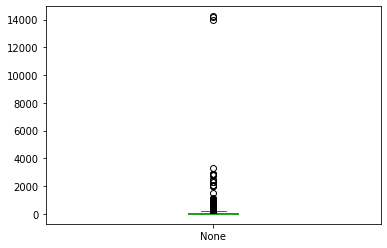

In [28]:
# EX.15-5 マハラノビス距離を用いて、外れ値を削除する
from sklearn.covariance import MinCovDet

mcd = MinCovDet(random_state=0)
mcd.fit(df)

maha_dis = mcd.mahalanobis(df)
tmp = pd.Series(maha_dis)
tmp.plot(kind='box')

In [55]:
num = tmp[tmp > 10000].index
num

Int64Index([258, 679, 737], dtype='int64')

In [63]:
df.index[num]

Int64Index([263, 689, 752], dtype='int64')

In [62]:
df = df.drop(index=df.index[num], axis=0)
print(df.shape)
print(df.head(3), "\n")
print(df.tail(3))

(876, 7)
   Survived  Pclass   Age  SibSp  Parch     Fare  male
0         0       3  22.0      1      0   7.2500     1
1         1       1  38.0      1      0  71.2833     0
2         1       3  26.0      0      0   7.9250     0 

     Survived  Pclass        Age  SibSp  Parch   Fare  male
888         0       3  29.699118      1      2  23.45     0
889         1       1  26.000000      0      0  30.00     1
890         0       3  32.000000      0      0   7.75     1


In [64]:
# EX.15-6 データフレームを標準化する
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_df = sc.fit_transform(df)
df2 = pd.DataFrame(sc_df, columns=df.columns)

In [65]:
# EX.15-7 クラスタ数「2」で、クラスタリングする
# クラスタリングの結果を標準化データフレームに追加する

from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=0)
model.fit(df2)

df2['cluster'] = model.labels_
print(df2.shape)
print(df2.head(3), "\n")
print(df2.tail(3))

(876, 8)
   Survived    Pclass       Age     SibSp     Parch      Fare      male  \
0 -0.786908  0.824682 -0.593752  0.441742 -0.467959 -0.563625  0.743768   
1  1.270797 -1.575390  0.636677  0.441742 -0.467959  0.985267 -1.344504   
2  1.270797  0.824682 -0.286145 -0.473071 -0.467959 -0.547297 -1.344504   

   cluster  
0        0  
1        1  
2        1   

     Survived    Pclass       Age     SibSp     Parch      Fare      male  \
873 -0.786908  0.824682 -0.001676  0.441742  2.016480 -0.171766 -1.344504   
874  1.270797 -1.575390 -0.286145 -0.473071 -0.467959 -0.013329  0.743768   
875 -0.786908  0.824682  0.175266 -0.473071 -0.467959 -0.551530  0.743768   

     cluster  
873        1  
874        1  
875        0  


<AxesSubplot:xlabel='cluster'>

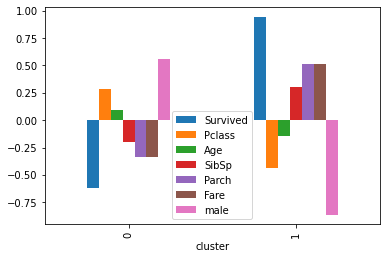

In [66]:
# EX.15-8 2つのクラスタのそれぞれの特徴を考察する
c = df2.groupby('cluster').mean()
c.plot(kind='bar')

- Survived（生存）
- Pclass（チケットクラス）
- Age（年齢）
- SibSp（同乗した兄弟や配偶者の総数）
- Parch（同乗した地震の親と子供の総数）
- Fare（運賃）
- male（男性）

- cluster1
  - 高クラスの船室
  - 若い年齢
  - 家族で乗船
  - 高い運賃
  - 女性